In [29]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('weibo_疫情.csv')
database.text=database.text.astype(str)

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
database

id        bid  \
0    4885796455189820  MzZXnlM6M   
1    4885798095159618  MA001lEfE   
2    4885798342624880  MA00qb0QM   
3    4885828327708782  MA0MMwlpc   
4    4885828256663289  MA0MFrXqp   
..                ...        ...   
917  4885349761288850  MzOkU5phU   
918  4885348145959120  MzOiip0eQ   
919  4885347010349578  MzOgt1sWm   
920  4885345844594898  MzOeAjhlg   
921  4885345520325512  MzOe41mGc   

                                                  text                 time  \
0    Don ' t promote the West ' s up to visit China...  2023-04-01 19:21:51   
1    The first concert that of people watched after...  2023-04-01 19:28:21   
2      ： There is ' s concert at the Sports Center ...  2023-04-01 19:29:21   
3    I was particularly happy on a spring weekend t...  2023-04-01 21:28:30   
4    I said why only 10 of medicine were given duri...  2023-04-01 21:28:13   
..                                                 ...                  ...   
917  Business slowly strength after the pandemic , ...  2023-03-31 13:46:51   
918  , the star of the version of Sheep , should be...  2023-03-31 13:40:26   
919  In the movie “ The Great Ming ”, the pharmacy ...  2023-03-31 13:35:55   
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 He...  2023-03-31 13:31:17   
921   【 The “ Plan ” a strong voice and certainty i...  2023-03-31 13:30:00   

                     author  repost_count  comment_count  attitudes_count  
0                       史凝眸             2             16               46  
1                       邹小樱             4             56             1027  
2               地铁客流及运输研究阿牛             6             44              228  
3                       恬筠-             0              0                0  
4                      Z闪闪呦             0              0                0  
..                      ...           ...            ...              ...  
917                 莲之花口腔小黄             2              8               26  
918  FilmThanapat-ChineseFC             4              6               63  
919               新西兰冷百科孙小社            18             16              195  
920                     凤凰网           130             38              365  
921                    凤凰卫视             3              0                5  

[922 rows x 8 columns]

In [31]:
#preprocess

In [32]:
preprocess_review = pd.DataFrame(database['text'])

In [33]:
preprocess_review

text
0    Don ' t promote the West ' s up to visit China...
1    The first concert that of people watched after...
2      ： There is ' s concert at the Sports Center ...
3    I was particularly happy on a spring weekend t...
4    I said why only 10 of medicine were given duri...
..                                                 ...
917  Business slowly strength after the pandemic , ...
918  , the star of the version of Sheep , should be...
919  In the movie “ The Great Ming ”, the pharmacy ...
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 He...
921   【 The “ Plan ” a strong voice and certainty i...

[922 rows x 1 columns]

In [34]:
# lower
overall_reviews_lower = []

for i in preprocess_review['text']:
    overall_reviews_lower.append(i.lower())

preprocess_review['text'] = overall_reviews_lower

In [35]:
preprocess_review

text
0    don ' t promote the west ' s up to visit china...
1    the first concert that of people watched after...
2      ： there is ' s concert at the sports center ...
3    i was particularly happy on a spring weekend t...
4    i said why only 10 of medicine were given duri...
..                                                 ...
917  business slowly strength after the pandemic , ...
918  , the star of the version of sheep , should be...
919  in the movie “ the great ming ”, the pharmacy ...
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he...
921   【 the “ plan ” a strong voice and certainty i...

[922 rows x 1 columns]

In [36]:
# remove punctuations

punctuations = '''()[]{};:'"\,<>./?@#$%^&*_~-'''

def remove_punct(text):
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct += char
        else:
            no_punct += " "
    
    return re.sub(' +', ' ',no_punct)

overall_reviews_remove_punct = []


for i in overall_reviews_lower:
    overall_reviews_remove_punct.append(remove_punct(i))
    
preprocess_review['text_remove_punct'] = overall_reviews_remove_punct

In [37]:
preprocess_review

text  \
0    don ' t promote the west ' s up to visit china...   
1    the first concert that of people watched after...   
2      ： there is ' s concert at the sports center ...   
3    i was particularly happy on a spring weekend t...   
4    i said why only 10 of medicine were given duri...   
..                                                 ...   
917  business slowly strength after the pandemic , ...   
918  , the star of the version of sheep , should be...   
919  in the movie “ the great ming ”, the pharmacy ...   
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he...   
921   【 the “ plan ” a strong voice and certainty i...   

                                     text_remove_punct  
0    don t promote the west s up to visit china nor...  
1    the first concert that of people watched after...  
2     ： there is s concert at the sports center tod...  
3    i was particularly happy on a spring weekend t...  
4    i said why only 10 of medicine were given duri...  
..                                                 ...  
917  business slowly strength after the pandemic an...  
918   the star of the version of sheep should be be...  
919  in the movie “ the great ming ” the pharmacy l...  
920   】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he ...  
921   【 the “ plan ” a strong voice and certainty i...  

[922 rows x 2 columns]

In [38]:
# remove stopwords
import gensim

all_stopwords = gensim.parsing.preprocessing.STOPWORDS

additional_stop_words = ['']

all_stopwords = all_stopwords.union(set(additional_stop_words))

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in tokens if not word in all_stopwords]
    clean = (" ").join(tokens_filtered)
    return clean

overall_reviews_clean = []

for i in overall_reviews_remove_punct:
    overall_reviews_clean.append(remove_mystopwords(i))

preprocess_review['text_clean'] = overall_reviews_clean

In [39]:
preprocess_review

text  \
0    don ' t promote the west ' s up to visit china...   
1    the first concert that of people watched after...   
2      ： there is ' s concert at the sports center ...   
3    i was particularly happy on a spring weekend t...   
4    i said why only 10 of medicine were given duri...   
..                                                 ...   
917  business slowly strength after the pandemic , ...   
918  , the star of the version of sheep , should be...   
919  in the movie “ the great ming ”, the pharmacy ...   
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he...   
921   【 the “ plan ” a strong voice and certainty i...   

                                     text_remove_punct  \
0    don t promote the west s up to visit china nor...   
1    the first concert that of people watched after...   
2     ： there is s concert at the sports center tod...   
3    i was particularly happy on a spring weekend t...   
4    i said why only 10 of medicine were given duri...   
..                                                 ...   
917  business slowly strength after the pandemic an...   
918   the star of the version of sheep should be be...   
919  in the movie “ the great ming ” the pharmacy l...   
920   】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he ...   
921   【 the “ plan ” a strong voice and certainty i...   

                                            text_clean  
0    t promote west s visit china normal diplomatic...  
1                      concert people watched pandemic  
2    ： s concert sports center today opening 8 o cl...  
3    particularly happy spring weekend trip pandemi...  
4    said 10 medicine given epidemic turned effecti...  
..                                                 ...  
917  business slowly strength pandemic immediately ...  
918  star version sheep finale wore pandemic 😷 broa...  
919  movie “ great ming ” pharmacy leader veteran a...  
920  】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 fore...  
921  【 “ plan ” strong voice certainty world day 博鳌...  

[922 rows x 3 columns]

In [40]:
#lemmatize 

def lemmatizing(string):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(string)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

overall_reviews_lemme = []

for i in overall_reviews_clean:
    overall_reviews_lemme.append(lemmatizing(i))

preprocess_review['text_lemme'] = overall_reviews_lemme

In [41]:
preprocess_review

text  \
0    don ' t promote the west ' s up to visit china...   
1    the first concert that of people watched after...   
2      ： there is ' s concert at the sports center ...   
3    i was particularly happy on a spring weekend t...   
4    i said why only 10 of medicine were given duri...   
..                                                 ...   
917  business slowly strength after the pandemic , ...   
918  , the star of the version of sheep , should be...   
919  in the movie “ the great ming ”, the pharmacy ...   
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he...   
921   【 the “ plan ” a strong voice and certainty i...   

                                     text_remove_punct  \
0    don t promote the west s up to visit china nor...   
1    the first concert that of people watched after...   
2     ： there is s concert at the sports center tod...   
3    i was particularly happy on a spring weekend t...   
4    i said why only 10 of medicine were given duri...   
..                                                 ...   
917  business slowly strength after the pandemic an...   
918   the star of the version of sheep should be be...   
919  in the movie “ the great ming ” the pharmacy l...   
920   】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 he ...   
921   【 the “ plan ” a strong voice and certainty i...   

                                            text_clean  \
0    t promote west s visit china normal diplomatic...   
1                      concert people watched pandemic   
2    ： s concert sports center today opening 8 o cl...   
3    particularly happy spring weekend trip pandemi...   
4    said 10 medicine given epidemic turned effecti...   
..                                                 ...   
917  business slowly strength pandemic immediately ...   
918  star version sheep finale wore pandemic 😷 broa...   
919  movie “ great ming ” pharmacy leader veteran a...   
920  】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 fore...   
921  【 “ plan ” strong voice certainty world day 博鳌...   

                                            text_lemme  
0    t promote west s visit china normal diplomatic...  
1                      concert people watched pandemic  
2    ： s concert sport center today opening 8 o clo...  
3    particularly happy spring weekend trip pandemi...  
4    said 10 medicine given epidemic turned effecti...  
..                                                 ...  
917  business slowly strength pandemic immediately ...  
918  star version sheep finale wore pandemic 😷 broa...  
919  movie “ great ming ” pharmacy leader veteran a...  
920  】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 fore...  
921  【 “ plan ” strong voice certainty world day 博鳌...  

[922 rows x 4 columns]

In [42]:
preprocess_review.to_csv('new_Cleaned_preprocessing_weibo_疫情.csv', index=False)

In [67]:
#Sentiment Analysis
# References: 1)https://www.youtube.com/watch?v=b9-0GpCqAQw&t=5s 2)https://huggingface.co/arpanghoshal/EmoRoBERTa

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

database1 = pd.read_csv('weibo_疫情.csv')

In [69]:
database2 = database1
database2 = database2.applymap(str)

In [70]:
#Size of dataset
database2.shape

(922, 9)

In [71]:
# New sentiment (Emoroberta - dataset labelled 58000 reddit comments with 28 emotions)
# Reference - https://github.com/amrrs/emotion-detection-from-text-python/blob/main/Text_Emotion_Detection_in_Python.ipynb

In [72]:
#Install pytorch
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
!pip install transformers -q


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
#from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
from transformers import pipeline

In [76]:
#pipeline route (speed)
#emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa' , return_all_scores= True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
C:\Users\Chung KY\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [77]:
#Append top 3 emotions into dataframe
database2['top_emotion'] = database2['text_lemme'][0:].apply(emotion,top_k=3)
database2

id        bid  \
0    4885800000000000.0  MzZXnlM6M   
1    4885800000000000.0  MA001lEfE   
2    4885800000000000.0  MA00qb0QM   
3    4885830000000000.0  MA0MMwlpc   
4    4885830000000000.0  MA0MFrXqp   
..                  ...        ...   
917  4885350000000000.0  MzOkU5phU   
918  4885350000000000.0  MzOiip0eQ   
919  4885350000000000.0  MzOgt1sWm   
920  4885350000000000.0  MzOeAjhlg   
921  4885350000000000.0  MzOe41mGc   

                                                  text             time  \
0    Don ' t promote the West ' s up to visit China...   4/1/2023 19:21   
1    The first concert that of people watched after...   4/1/2023 19:28   
2      ： There is ' s concert at the Sports Center ...   4/1/2023 19:29   
3    I was particularly happy on a spring weekend t...   4/1/2023 21:28   
4    I said why only 10 of medicine were given duri...   4/1/2023 21:28   
..                                                 ...              ...   
917  Business slowly strength after the pandemic , ...  3/31/2023 13:46   
918  , the star of the version of Sheep , should be...  3/31/2023 13:40   
919  In the movie “ The Great Ming ”, the pharmacy ...  3/31/2023 13:35   
920  [ 】 国务院总理李强30日下午出席博鳌亚洲论坛2023年年会的中外企业家代表座谈 。 He...  3/31/2023 13:31   
921   【 The “ Plan ” a strong voice and certainty i...  3/31/2023 13:30   

                     author repost_count comment_count attitudes_count  \
0                       史凝眸            2            16              46   
1                       邹小樱            4            56            1027   
2               地铁客流及运输研究阿牛            6            44             228   
3                       恬筠-            0             0               0   
4                      Z闪闪呦            0             0               0   
..                      ...          ...           ...             ...   
917                 莲之花口腔小黄            2             8              26   
918  FilmThanapat-ChineseFC            4             6              63   
919               新西兰冷百科孙小社           18            16             195   
920                     凤凰网          130            38             365   
921                    凤凰卫视            3             0               5   

                                            text_lemme  \
0    t promote west s visit china normal diplomatic...   
1                      concert people watched pandemic   
2    ï¼š s concert sport center today opening 8 o c...   
3    particularly happy spring weekend trip pandemi...   
4    said 10 medicine given epidemic turned effecti...   
..                                                 ...   
917  business slowly strength pandemic immediately ...   
918  star version sheep finale wore pandemic ðŸ˜· b...   
919  movie â€œ great ming â€ pharmacy leader veter...   
920  ã€‘ å›½åŠ¡é™¢æ€»ç†æŽå¼º30æ—¥ä¸‹åˆå‡ºå¸­åšé...   
921  ã€ â€œ plan â€ strong voice certainty world ...   

                                           top_emotion  
0    [{'label': 'neutral', 'score': 0.9803692698478...  
1    [{'label': 'neutral', 'score': 0.9624776840209...  
2    [{'label': 'neutral', 'score': 0.8478981852531...  
3    [{'label': 'joy', 'score': 0.6401050686836243}...  
4    [{'label': 'relief', 'score': 0.52383899688720...  
..                                                 ...  
917  [{'label': 'neutral', 'score': 0.7279829978942...  
918  [{'label': 'neutral', 'score': 0.9604057073593...  
919  [{'label': 'admiration', 'score': 0.5870971083...  
920  [{'label': 'neutral', 'score': 0.9450128674507...  
921  [{'label': 'neutral', 'score': 0.9645991921424...  

[922 rows x 10 columns]

In [78]:
#Extracting data frame into csv for data visualization
database2.to_csv('top3_emotions_weibo_疫情_1.csv', index=False)

# Visualization

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib
import seaborn as sns
%matplotlib inline

database = pd.read_csv('weibo_封城.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


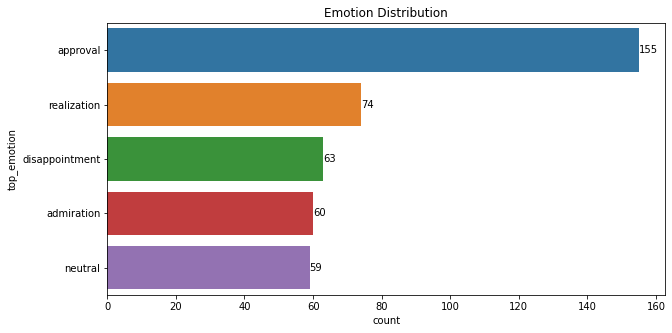

In [2]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Emotion Distribution')

plt.savefig('../WeiBo_Output/weibo_封城_Top_5_emotions.png', dpi=400, bbox_inches="tight")

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib
import seaborn as sns
%matplotlib inline

database = pd.read_csv('weibo_封城+疫情.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


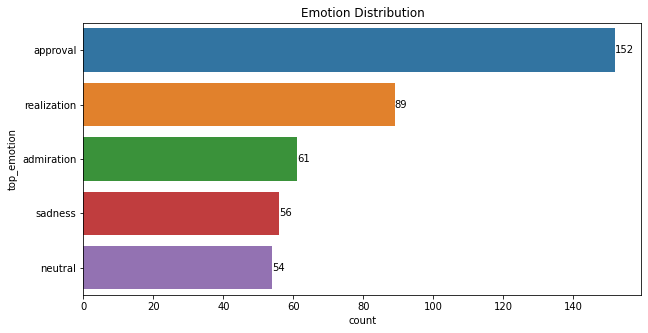

In [4]:
#Display bar chart
plt.figure(figsize=(10,5))
ax = sns.countplot(data=database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Emotion Distribution')

plt.savefig('../WeiBo_Output/weibo_封城+疫情_Top_5_emotions.png', dpi=400, bbox_inches="tight")

In [5]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib
import seaborn as sns
%matplotlib inline

database = pd.read_csv('weibo_疫情.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


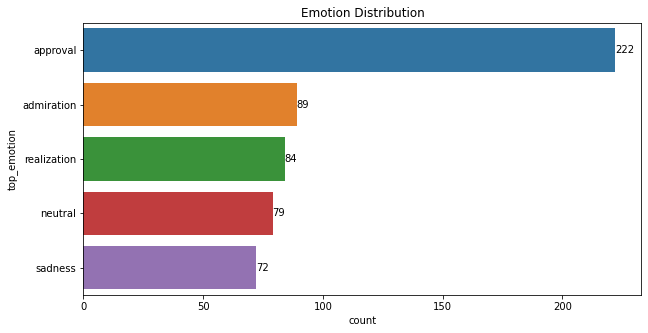

In [6]:
#Display bar chart
plt.figure(figsize=(10,5))
ax = sns.countplot(data=database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Emotion Distribution')

plt.savefig('../WeiBo_Output/weibo_疫情_Top_5_emotions.png', dpi=400, bbox_inches="tight")